# Python ile Sosyal Ag Analizi I
Networku Olusturmak

> Bu calisma Uzay Cetin tarafindan, Uskudar Amerikan Lisesi CodeFest 2018 (https://www.codefesttr.org) icin hazirlanmistir. 

NetworkX version: 2.0 gereklidir.

___

[Genel olarak Ag Bilimi ve Bilgisayim Organizasyonu](https://github.com/uzay00/CMPE232/tree/master/Lecture1)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.4


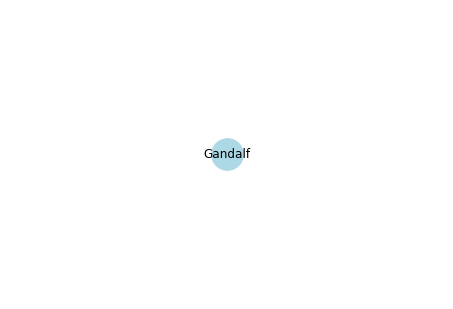

In [2]:
G = nx.Graph() # empty graph
G.add_node("Gandalf")
nx.draw(G, node_size=1000, node_color='lightblue', with_labels=True)

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1
Number of edges: 0
Average degree:   0.0000


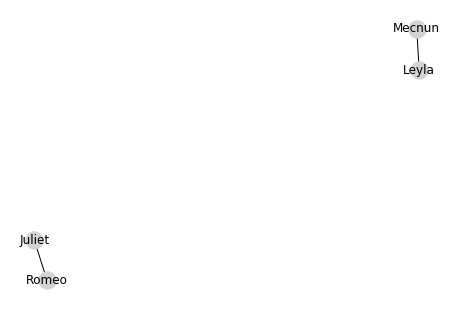

In [4]:
G = nx.Graph(subject='love', name='Book Graph') 
G.add_edge("Leyla","Mecnun")
G.add_edge("Juliet","Romeo")
nx.draw(G, with_labels=True,node_color='lightgray')

In [5]:
print(nx.info(G))

Name: Book Graph
Type: Graph
Number of nodes: 4
Number of edges: 2
Average degree:   1.0000


### Dugum Ozellilerini Belirleme

In [6]:
ozellik = 'cinsiyet'
G.node['Leyla'][ozellik] = 'Kadin'
G.node['Juliet'][ozellik] = 'Kadin'

G.node['Mecnun'][ozellik] = 'Erkek'
G.node['Romeo'][ozellik] = 'Erkek'

AttributeError: 'Graph' object has no attribute 'node'

In [ ]:
list(G.nodes(data=True))

In [ ]:
print(list(G.nodes(data=ozellik)))

In [ ]:
[(dugum, deger) for dugum, deger in G.nodes(data=ozellik)]

#### Soru 1: Kadin Dugumleri Sec

In [ ]:
# [dugum for dugum, deger in G.nodes(data=ozellik) if deger == 'Kadin']

### Baglanti Ozelliklerini Belirleme

In [ ]:
G.add_edge("Gandalf","Mecnun", arkadas = True)
G.add_edge("Gandalf","Romeo", arkadas = True)
G.add_edge("Romeo","Mecnun", arkadas = True)
G.node['Gandalf']['cinsiyet'] = 'Erkek'

In [ ]:
nx.draw(G, node_size=1000, node_color='lightblue', with_labels=True)

In [ ]:
nx.get_edge_attributes(G, 'arkadas')

In [ ]:
G['Leyla']['Mecnun']['ask']= True
G['Juliet']['Romeo']['ask']= True
nx.get_edge_attributes(G, 'ask')

In [ ]:
G.edges

In [ ]:
G.edges(data = True)

In [ ]:
for n1, n2, attr in G.edges(data=True): # unpacking
        print(n1, n2, attr)

In [ ]:
for node in G.nodes(): # or node in g.nodes_iter():
    print(node, G.degree(node))

#### Soru 2: Kimler Birbirine Asik?

In [ ]:
#list(nx.get_edge_attributes(G, 'ask').keys())
#list(nx.get_edge_attributes(G, 'arkadas').keys())

## Detayli Cizim

In [ ]:
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

In [ ]:
nx.draw(G, pos=pos_fr, node_size=1000, node_color='lightblue', with_labels=True)

### Kadin ve Erkekleri Secelim

In [ ]:
kadinlar = {dugum for dugum, deger in G.nodes(data=ozellik) if deger == 'Kadin'}
erkekler = set(G) - kadinlar
print(kadinlar)
print(erkekler)

In [ ]:
plt.figure(figsize=(10,10))
# Plot nodes
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=kadinlar, node_size=2000, node_color='pink')
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=erkekler, node_size=1000, node_color='lightblue')
# Plot node labels
nx.draw_networkx_labels(G, pos=pos_fr)
# Remove axes
ax = plt.gca()
ax.set_axis_off()

### Ask ve Arkadaslik iliskilerini Belirleyelim

In [ ]:
asik = list(nx.get_edge_attributes(G, 'ask').keys())
arkadas = list(nx.get_edge_attributes(G, 'arkadas').keys())

#### Soru3: Bu iliskinin adini koyalim
Her cift dugumu anahtar (key) kabul eden, iliski adini deger (value) olarak belirleyen bir sozluk (dictionary) yazalim.

In [ ]:
iliskiler = {}
for cift in asik:
    iliskiler[cift] = 'asik'
for cift in arkadas:
    iliskiler[cift] = 'arkadas'
iliskiler

In [ ]:
plt.figure(figsize=(10,10))
# Plot nodes
nx.draw_networkx_nodes(G, alpha = 0.7, pos=pos_fr, nodelist=kadinlar, node_size=2000, node_color='pink')
nx.draw_networkx_nodes(G, alpha = 0.7, pos=pos_fr, nodelist=erkekler, node_size=1000, node_color='lightblue')
# Plot node labels
nx.draw_networkx_labels(G, pos=pos_fr)
# Plot edges 
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=asik, width=5, edge_color='red')
nx.draw_networkx_edges(G, pos=pos_fr, edge_list=arkadas, edge_color='green')
# Plot edge labels
nx.draw_networkx_edge_labels(G, pos=pos_fr, edge_labels=iliskiler)
plt.tight_layout()
# Remove axes
ax = plt.gca()
ax.set_axis_off()

In [ ]:
print(nx.info(G))

In [ ]:
# Let's get a list of nodes with their attributes.
dict(G.nodes(data=True))

In [ ]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()

In [ ]:
from nxviz import CircosPlot

c = CircosPlot(G, node_color='cinsiyet', node_grouping='cinsiyet')
c.draw()

In [ ]:
# Farkli layout'lar
[lay for lay in nx.__dir__() if lay.endswith('_layout')]

## Summary

https://github.com/MaxPoon/coursera-Applied-Data-Science-with-Python/tree/master/Applied-Social-Network-Analysis-In-Python/week1

https://nikoleta-v3.github.io/blog/2017/10/19/python-graphs-got.html

https://www.coursera.org/learn/python-social-network-analysis/home/week/3

Many complex structures can be modeled through networks. We can give examples from social networks from biology networks, transportation networks, and so on. 

<img src="Figures/networkx1.png" alt="Kaynak:https://www.coursera.org/learn/python-social-network-analysis/lecture/oQ60i/network-definition-and-vocabulary" width=700 height=600>

<img src="Figures/networkx2.png" alt="Kaynak:https://www.coursera.org/learn/python-social-network-analysis/lecture/oQ60i/network-definition-and-vocabulary" width=700 height=600>

<img src="Figures/networkx3.png" alt="Kaynak:https://www.coursera.org/learn/python-social-network-analysis/lecture/oQ60i/network-definition-and-vocabulary" width=700 height=600>